In [1]:
import numpy as np
import pandas as pd
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import Sequential, models
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
import matplotlib.pyplot as plt
import seaborn as sns

2024-05-14 09:55:49.333378: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-14 09:55:52.413498: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
path = '/home/verlo/dev_ws/DeepLearning/data/OX_data'
dataset = {
    "image_path": [],
    "OX_status": [],
    "where": []
}

for where in os.listdir(path):
  for status in os.listdir(path+"/"+where):
    for image in glob.glob(path+"/"+where+"/"+status+"/"+"*.png"):
      dataset["image_path"].append(image)
      dataset["OX_status"].append(status)
      dataset["where"].append(where)

dataset = pd.DataFrame(dataset)
dataset

,image_path,OX_status,where
0,/home/verlo/dev_ws/DeepLearning/data/OX_data/t...,O,train
1,/home/verlo/dev_ws/DeepLearning/data/OX_data/t...,O,train
2,/home/verlo/dev_ws/DeepLearning/data/OX_data/t...,O,train
3,/home/verlo/dev_ws/DeepLearning/data/OX_data/t...,O,train
4,/home/verlo/dev_ws/DeepLearning/data/OX_data/t...,O,train
...,...,...,...
115,/home/verlo/dev_ws/DeepLearning/data/OX_data/t...,X,test
116,/home/verlo/dev_ws/DeepLearning/data/OX_data/t...,X,test
117,/home/verlo/dev_ws/DeepLearning/data/OX_data/t...,X,test
118,/home/verlo/dev_ws/DeepLearning/data/OX_data/t...,X,test


In [3]:
dataset.iloc[60]

image_path    /home/verlo/dev_ws/DeepLearning/data/OX_data/t...
OX_status                                                     X
where                                                     train
Name: 60, dtype: object

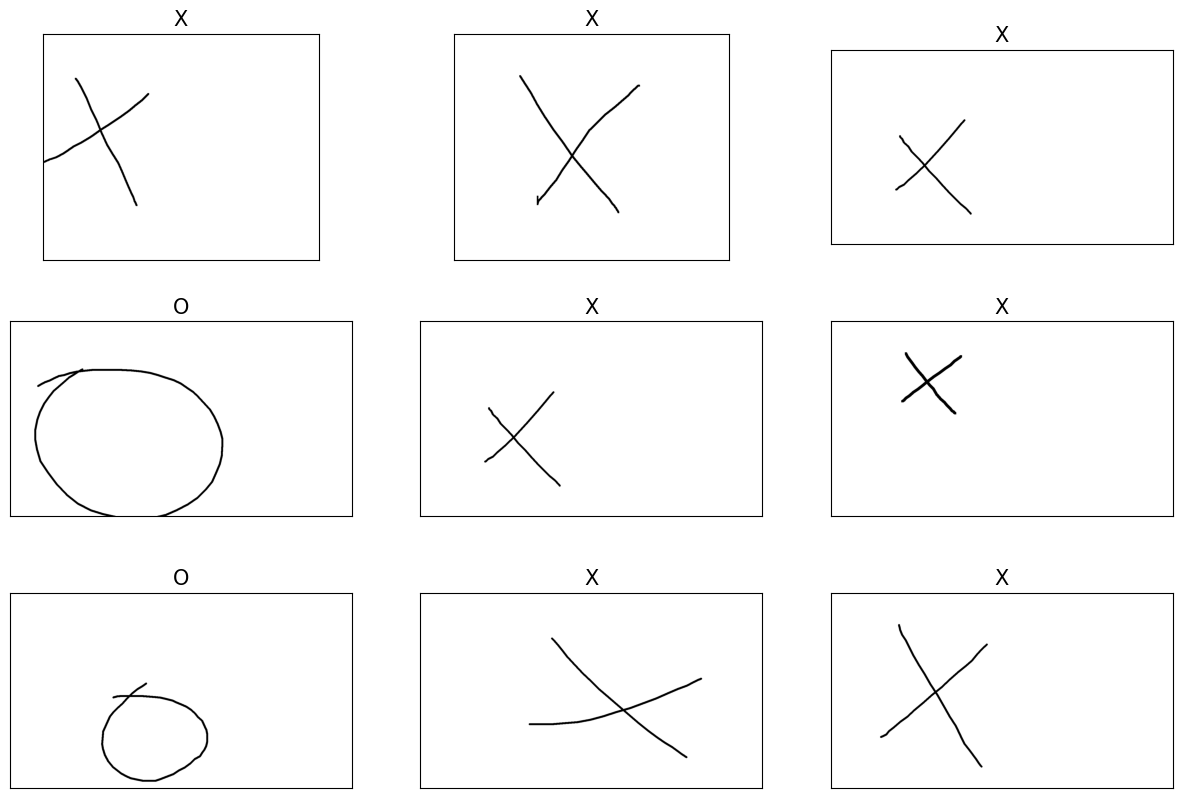

In [5]:
import cv2

plt.figure(figsize = (15, 10))

for i in range(9):
  random = np.random.randint(1, len(dataset))
  plt.subplot(3, 3, i+1)
  plt.imshow(cv2.imread(dataset.loc[random, "image_path"]))
  plt.title(dataset.loc[random, "OX_status"], size = 15)
  plt.xticks([])
  plt.yticks([])

plt.show()

In [6]:
dataset

,image_path,OX_status,where
0,/home/verlo/dev_ws/DeepLearning/data/OX_data/t...,O,train
1,/home/verlo/dev_ws/DeepLearning/data/OX_data/t...,O,train
2,/home/verlo/dev_ws/DeepLearning/data/OX_data/t...,O,train
3,/home/verlo/dev_ws/DeepLearning/data/OX_data/t...,O,train
4,/home/verlo/dev_ws/DeepLearning/data/OX_data/t...,O,train
...,...,...,...
115,/home/verlo/dev_ws/DeepLearning/data/OX_data/t...,X,test
116,/home/verlo/dev_ws/DeepLearning/data/OX_data/t...,X,test
117,/home/verlo/dev_ws/DeepLearning/data/OX_data/t...,X,test
118,/home/verlo/dev_ws/DeepLearning/data/OX_data/t...,X,test


In [7]:
train_df = dataset[dataset["where"] == "train"]
test_df = dataset[dataset["where"] == "test"]

print(train_df.head(10))

                                          image_path OX_status  where
0  /home/verlo/dev_ws/DeepLearning/data/OX_data/t...         O  train
1  /home/verlo/dev_ws/DeepLearning/data/OX_data/t...         O  train
2  /home/verlo/dev_ws/DeepLearning/data/OX_data/t...         O  train
3  /home/verlo/dev_ws/DeepLearning/data/OX_data/t...         O  train
4  /home/verlo/dev_ws/DeepLearning/data/OX_data/t...         O  train
5  /home/verlo/dev_ws/DeepLearning/data/OX_data/t...         O  train
6  /home/verlo/dev_ws/DeepLearning/data/OX_data/t...         O  train
7  /home/verlo/dev_ws/DeepLearning/data/OX_data/t...         O  train
8  /home/verlo/dev_ws/DeepLearning/data/OX_data/t...         O  train
9  /home/verlo/dev_ws/DeepLearning/data/OX_data/t...         O  train
